In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv("/home/moraa/Documents/2024_projects/Kaggle_titanic_competition/titanic_machine_learning_project/data/raw/titanic/train.csv")
test = pd.read_csv("/home/moraa/Documents/2024_projects/Kaggle_titanic_competition/titanic_machine_learning_project/data/raw/titanic/test.csv")

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
data = pd.concat([train,test])

%matplotlib inline
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

Data Exploration

In [6]:
df_num = train[["Age","SibSp", "Parch", "Fare"]]
df_cat = train[["Survived", "Pclass", "Sex", "Cabin", "Embarked","Ticket"]]

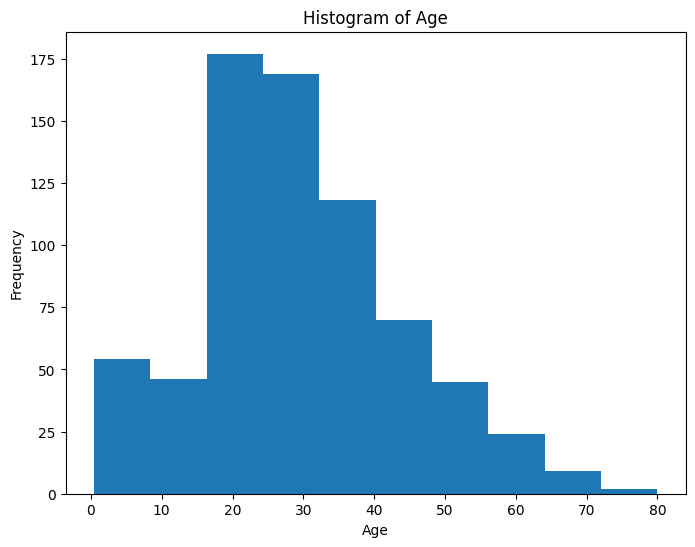

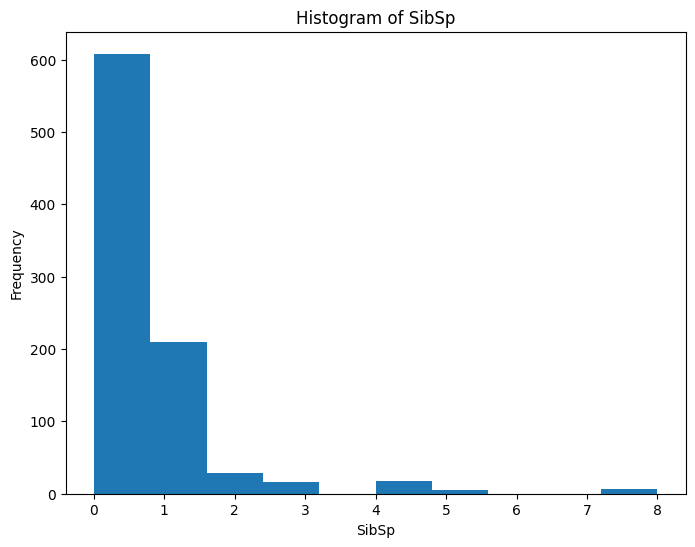

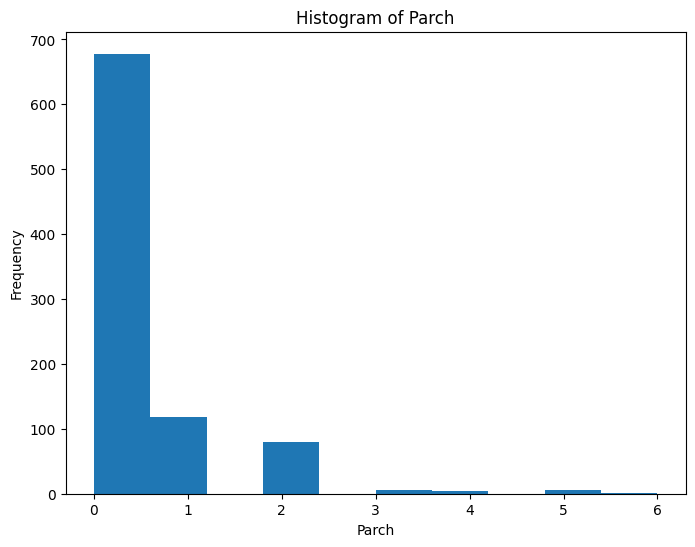

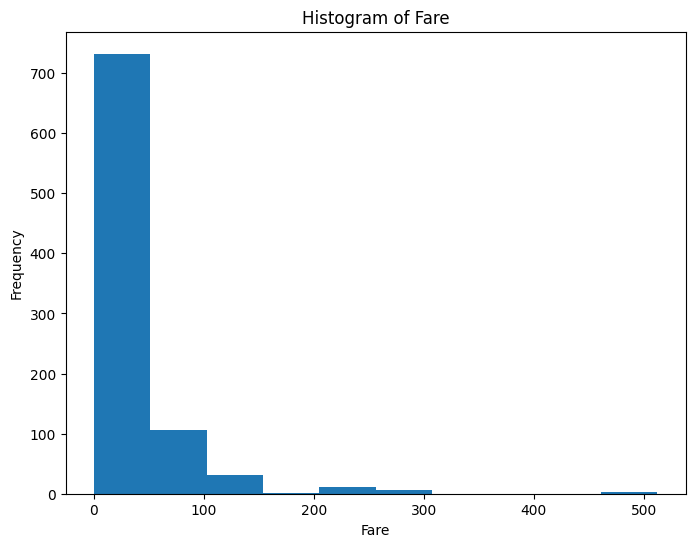

In [7]:
for column in df_num.columns:
    plt.figure(figsize=(8, 6))  # Set the figure size for each histogram
    plt.hist(df_num[column]) 
    plt.xlabel(column)  # Set the x-axis label to the column name
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


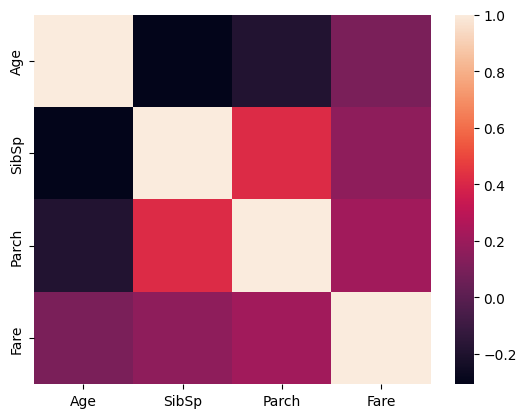

In [8]:
sns.heatmap(df_num.corr())
print(df_num.corr())

In [9]:
pivot_table = train.pivot_table(
   index = "Survived",
    values = ["Age", "SibSp", "Fare", "Parch"]
    )
pivot_table

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


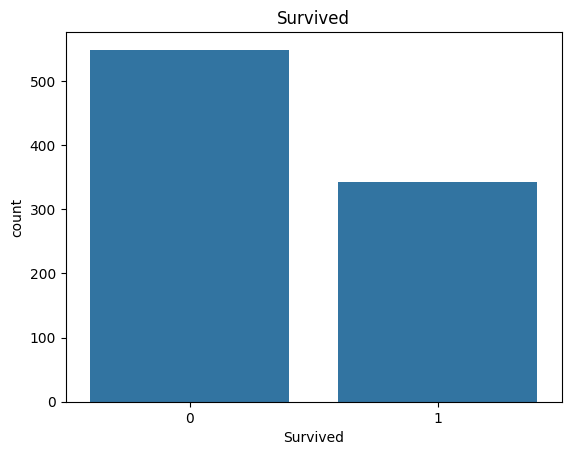

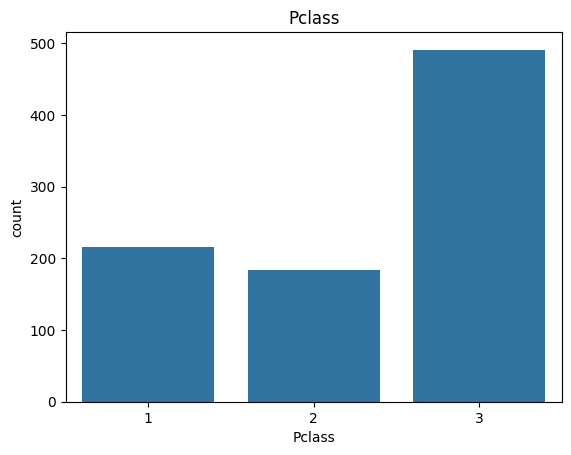

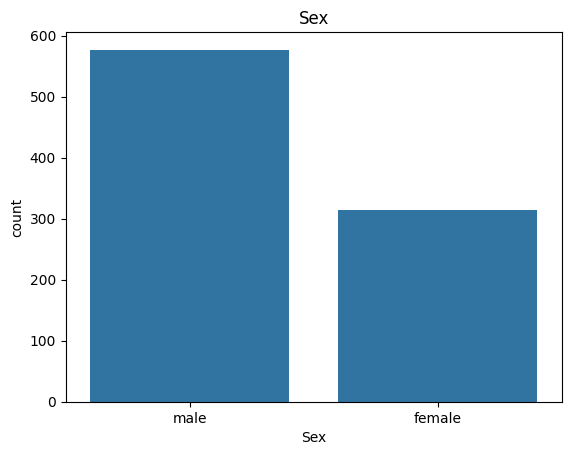

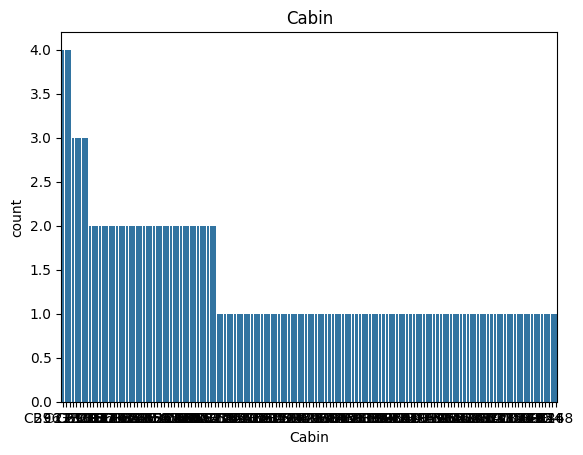

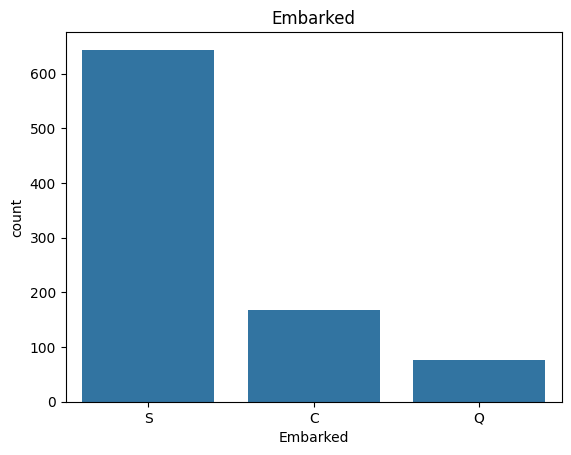

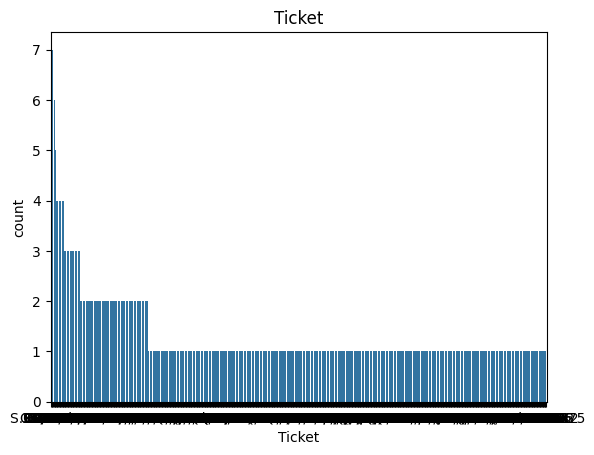

In [10]:
for column in df_cat.columns:
    sns.barplot(
        x = df_cat[column].value_counts().index,
        y = df_cat[column].value_counts()
    ).set_title(column)
    plt.show()

In [11]:
print(pd.pivot_table(train, index = "Survived", columns = "Sex", 
                     values = "Ticket", aggfunc = "count"))

print(pd.pivot_table(train, index = "Survived", columns = "Pclass", 
                     values = "Ticket", aggfunc = "count"))

print(pd.pivot_table(train, index = "Survived", columns = "Embarked", 
                     values = "Ticket", aggfunc = "count"))

print(pd.pivot_table(train, index = "Survived", columns = "Cabin", 
                     values = "Ticket", aggfunc = "count"))

Sex       female  male
Survived              
0             81   468
1            233   109
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
Cabin     A10  A14  A16  A19  A20  A23  A24  A26  A31  A32  ...   E8  F E69  \
Survived                                                    ...               
0         1.0  1.0  NaN  1.0  NaN  NaN  1.0  NaN  NaN  1.0  ...  NaN    NaN   
1         NaN  NaN  1.0  NaN  1.0  1.0  NaN  1.0  1.0  NaN  ...  2.0    1.0   

Cabin     F G63  F G73   F2  F33  F38   F4   G6    T  
Survived                                              
0           1.0    2.0  1.0  NaN  1.0  NaN  2.0  1.0  
1           NaN    NaN  2.0  3.0  NaN  2.0  2.0  NaN  

[2 rows x 147 columns]


Feature Engineering

In [16]:
train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [17]:
train["Multiple_cabins"] = train.Cabin.apply(lambda column: 0 if pd.isna(column) 
                                             else len(column.split(" ")))
train["Multiple_cabins"].value_counts()


Multiple_cabins
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [18]:
#Define a function to calculate the number of cabins
def number_of_cabins(column):
    if pd.isna(column):
        return 0
    else:
        return len(column.split(" "))
        
train["multiple_cabin"] = train["Cabin"].apply(number_of_cabins)
train["multiple_cabin"].value_counts()

multiple_cabin
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [19]:
pd.pivot_table(train, index="Survived", columns = "Multiple_cabins",
               values = "Ticket", aggfunc = "count")

Multiple_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [20]:
#Check the letters of the cabins 
train["Cabin_letters"] = train.Cabin.apply(lambda column: str(column)[0])
train["Cabin_letters"]

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin_letters, Length: 891, dtype: object

In [21]:
pd.pivot_table(train, index = "Survived", columns = "Cabin_letters",
               values = "Name", aggfunc = "count")
train["Cabin_letters"].value_counts()


Cabin_letters
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [22]:
pivot_table_2 = train.pivot_table(index = "Survived", columns = "Cabin_letters", 
                                  values = "Name", aggfunc = "count" )
pivot_table_2

Cabin_letters,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [23]:
train["ticket_numerics"] = train.Ticket.apply(lambda column: 1 if column.isnumeric() else 0 )
train["ticket_letters"] = train.Ticket.apply(lambda column: ' '.join(column.split(' ')[:-1])
                                             .replace('.', '').replace('/', '').lower()
                                            if len(column.split(' ')[:-1]) >0 else 0)

In [24]:
pd.set_option("display.max_rows", None)
train["ticket_letters"].value_counts()

ticket_letters
0             665
pc             60
ca             41
a5             21
sotonoq        15
stono 2        12
scparis        11
wc             10
a4              7
stono2          6
soc             6
fcc             5
c               5
wep             3
sopp            3
pp              3
swpp            2
sotono2         2
scah            2
ppp             2
scow            1
sp              1
sc              1
fa              1
as              1
scah basle      1
sop             1
fc              1
sca4            1
casoton         1
Name: count, dtype: int64

In [25]:
train.pivot_table(index = "Survived", columns="ticket_numerics", values="Ticket", aggfunc = "count")


ticket_numerics,0,1
Survived,,
0,142,407
1,88,254


In [26]:
train.pivot_table(index="Survived", columns = "ticket_letters", values = "Ticket", aggfunc="count")

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,sop,sopp,sotono2,sotonoq,sp,stono 2,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,1.0,3.0,2.0,13.0,1.0,7.0,3.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,2.0,NaN,5.0,3.0,2.0,1.0,1.0


In [27]:
train["Name"].head(10)
train["name_title"] = train.Name.apply(lambda column: column.split(",")[1].split(".")[0].strip())
train["name_title"].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

(889,)

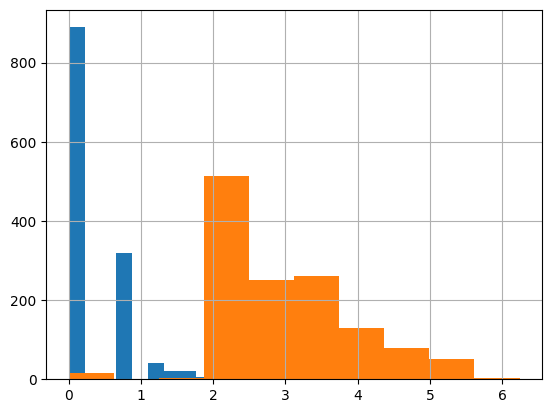

In [28]:
#create the categorical variables
data["Multiple_cabins"] = data.Cabin.apply(lambda column: 0 if pd.isna(column) 
                                             else len(column.split(" ")))
data["Cabin_letters"] = data.Cabin.apply(lambda column: str(column)[0])
data["ticket_numerics"] = data.Ticket.apply(lambda column: 1 if column.isnumeric() else 0 )
data["ticket_letters"] = data.Ticket.apply(lambda column: ' '.join(column.split(' ')[:-1])
                                             .replace('.', '').replace('/', '').lower()
                                            if len(column.split(' ')[:-1]) >0 else 0)
data["name_title"] = data.Name.apply(lambda column: column.split(",")[1].split(".")[0].strip())


#drop the null values in the embarked column
data.dropna(subset = ["Embarked"], inplace=True)

#include the relevant data
data["Age"] = data["Age"].fillna(data.Age.mean())
data["Fare"] = data["Fare"].fillna(data.Fare.median())

#transform the categorical data
data["norm_sibsp"] = np.log(data.SibSp+1)
data["norm_sibsp"].hist()
#impute the fare ad the age data
data["norm_fare"] = np.log(data.Fare+1)
data["norm_fare"].hist()

#converting pclass to a str from a int
data["Pclass"].astype(str)
#getting the dummies
data_dummies = pd.get_dummies(data[["Pclass", "Sex", "Age", "SibSp", "Parch", "norm_fare", 
                "Embarked", "Cabin_letters", "Multiple_cabins", "ticket_numerics",
                "name_title", "train_test"]])

#splittig the data ito train and test sets
X_train = data_dummies[data_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = data_dummies[data_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = data[data.train_test==1].Survived
y_train.shape


Model Building

In [29]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

data_dummies_scaled = data_dummies.copy()
data_dummies_scaled[["Age", "SibSp", "Parch", "norm_fare"]] = scale.fit_transform(
    data_dummies_scaled[["Age", "SibSp", "Parch", "norm_fare"]])

X_trained_scaled = data_dummies_scaled[
    data_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)

X_test_scaled = data_dummies_scaled[
    data_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = data[data.train_test==1].Survived

In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

#list of Models
models = [
    #LinearRegression(),
    LogisticRegression(max_iter = 2000),
    DecisionTreeClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42),
    GradientBoostingClassifier(n_estimators=100, random_state =42),
    SVC(probability = True),
    KNeighborsClassifier(),
    GaussianNB(),
]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring="accuracy")
    scores_1 = cross_val_score(model, X_trained_scaled, y_train, cv = 5, scoring="accuracy")
    print(f"Model: {model.__class__.__name__}")
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", np.mean(scores))
    print("Mean Accuracy:", np.mean(scores_1))
    

Model: LogisticRegression
Cross-Validation Scores: [0.80898876 0.82022472 0.80337079 0.82022472 0.85310734]
Mean Accuracy: 0.8211832666793626
Mean Accuracy: 0.8211832666793626
Model: DecisionTreeClassifier
Cross-Validation Scores: [0.75280899 0.75280899 0.8258427  0.75280899 0.85310734]
Mean Accuracy: 0.7874754015108232
Mean Accuracy: 0.7908461880276774
Model: RandomForestClassifier
Cross-Validation Scores: [0.82022472 0.79775281 0.84831461 0.74157303 0.83050847]
Mean Accuracy: 0.8076747286231194
Mean Accuracy: 0.8065384371230877
Model: GradientBoostingClassifier
Cross-Validation Scores: [0.81460674 0.79775281 0.84831461 0.81460674 0.86440678]
Mean Accuracy: 0.8279375357074843
Mean Accuracy: 0.8279375357074843
Model: SVC
Cross-Validation Scores: [0.68539326 0.76966292 0.7247191  0.71910112 0.75706215]
Mean Accuracy: 0.7311877102774075
Mean Accuracy: 0.8290547832158953
Model: KNeighborsClassifier
Cross-Validation Scores: [0.78651685 0.79775281 0.79775281 0.82022472 0.83615819]
Mean Accu

In [31]:
from sklearn.ensemble import VotingClassifier

#Create an instance of all the models
log = LogisticRegression(max_iter = 2000) #
D_trees = DecisionTreeClassifier(random_state = 42)
r_forest = RandomForestClassifier(random_state = 42)
g_boost = GradientBoostingClassifier(random_state =42)
svc = SVC(probability = True) #
knn = KNeighborsClassifier()
naive_bayes = GaussianNB() 

v_clf = VotingClassifier(estimators = [
    ("log", log),
    ("D_trees",D_trees),
    ("r_forest", r_forest),
    ("g_boost", g_boost),
    ("svc", svc),
    ("knn", knn),
    ("naives_bayes", naive_bayes)
], voting="soft")

scores = cross_val_score(v_clf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.80337079 0.80337079 0.8258427  0.79213483 0.87570621]
0.8200850631625721


In [32]:
v_clf.fit(X_trained_scaled,y_train)
y_hat_base_vc = v_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#defining the hyperparameters for all the possible models
params_grids = {
    "logistic_regression" : {'max_iter' : [2000],
                      'penalty' : ['l1', 'l2'],
                      'C' : np.logspace(-4, 4, 20),
                      'solver' : ['liblinear']},
    
    "knn": { 'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]},
              
    "random_forest": {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]},
    
    "gradient_boosting": {'n_estimators': [50, 100, 200], 'max_depth': [15, 20, 25]},
}

# Models to be used in grid search and randomized search
models = {
    'logistic_regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'knn': KNeighborsClassifier(),
    
}


#performing randomized and grid search  for every model
for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(estimator = model, param_grid = params_grids[model_name], 
                              cv = 5, verbose = True, n_jobs = -1,
                               scoring = "accuracy").fit(X_trained_scaled, y_train)
    best_params_grid = grid_search.best_params_
    best_score_grid = grid_search.best_score_
    best_estimator_grid = grid_search.best_estimator_
    
    print(f"Hyperparameters (Grid Search) for {model_name}: {best_params_grid}")
    print(f"Best Score (Grid Search)  for {model_name}: {best_score_grid}\n")
    print(f"Best Estimator (Grid Search) for {model_name}: {best_estimator_grid}\n")
    
    
    print(f"Performing Randomized Search for {model_name}...")
    param_dist = params_grids[model_name]
    randomized_search = RandomizedSearchCV(estimator = model, param_distributions=param_dist, 
                                           n_iter = 100, cv = 5, verbose = True, 
                                           n_jobs = -1).fit(X_trained_scaled, y_train)
    
    best_params_randomized = randomized_search.best_params_
    best_score_randomized =  randomized_search.best_score_
    print(f"Best Hyperparameters (Randomized Search) for {model_name}: {best_params_randomized}")
    print(f"Best Score (Randomized Search) for {model_name}: {best_score_randomized}\n")
    

Performing Grid Search for logistic_regression...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Hyperparameters (Grid Search) for logistic_regression: {'C': 11.288378916846883, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score (Grid Search)  for logistic_regression: 0.8223132101821875

Best Estimator (Grid Search) for logistic_regression: LogisticRegression(C=11.288378916846883, max_iter=2000, penalty='l1',
                   solver='liblinear')

Performing Randomized Search for logistic_regression...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/home/moraa/Documents/2024_projects/Kaggle_titanic_competition/titanic_machine_learning_project/titanic_venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters (Randomized Search) for logistic_regression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 2000, 'C': 1.623776739188721}
Best Score (Randomized Search) for logistic_regression: 0.8223068621849807

Performing Grid Search for random_forest...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Hyperparameters (Grid Search) for random_forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (Grid Search)  for random_forest: 0.8346727607439852

Best Estimator (Grid Search) for random_forest: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

Performing Randomized Search for random_forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters (Randomized Search) for random_forest: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
Best Score (Randomized Search) for random

/home/moraa/Documents/2024_projects/Kaggle_titanic_competition/titanic_machine_learning_project/titanic_venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters (Randomized Search) for gradient_boosting: {'n_estimators': 50, 'max_depth': 25}
Best Score (Randomized Search) for gradient_boosting: 0.7941979305529105

Performing Grid Search for knn...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Hyperparameters (Grid Search) for knn: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score (Grid Search)  for knn: 0.8267948962102457

Best Estimator (Grid Search) for knn: KNeighborsClassifier(n_neighbors=7, p=1)

Performing Randomized Search for knn...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/moraa/Documents/2024_projects/Kaggle_titanic_competition/titanic_machine_learning_project/titanic_venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters (Randomized Search) for knn: {'weights': 'uniform', 'p': 1, 'n_neighbors': 7, 'algorithm': 'auto'}
Best Score (Randomized Search) for knn: 0.8267948962102457



In [34]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [35]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_trained_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8223132101821875
Best Parameters: {'C': 11.288378916846883, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [36]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_trained_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8267948962102457
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [37]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_trained_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Random Forest
Best Score: 0.8324255697327493
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}


<Axes: >

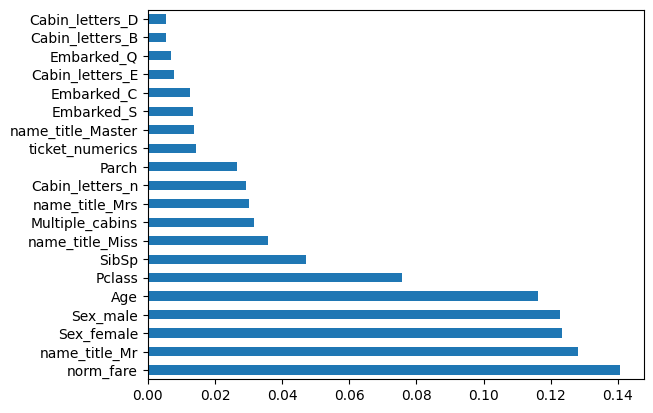

In [38]:
best_rf = best_clf_rf.best_estimator_.fit(X_trained_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_trained_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [39]:
best_estimators = {}

for model_name, model in models.items():
    best_estimators[f"{model_name}_GridSearch"] = grid_search.best_estimator_
    best_estimators[f'{model_name}_RandomizedSearch'] = randomized_search.best_estimator_
    
    print(f"Best Estimator{best_estimators}")
#doing now the voting  classifier hard and soft
voting_clf_hard = VotingClassifier(
    estimators=[(model_name, estimator) for model_name, estimator in best_estimators.items()],
    voting="hard"
)
voting_clf_soft = VotingClassifier(
    estimators=[(model_name, estimator) for model_name, estimator in best_estimators.items()],
    voting= "soft"
)

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())


Best Estimator{'logistic_regression_GridSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'logistic_regression_RandomizedSearch': KNeighborsClassifier(n_neighbors=7, p=1)}
Best Estimator{'logistic_regression_GridSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'logistic_regression_RandomizedSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'random_forest_GridSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'random_forest_RandomizedSearch': KNeighborsClassifier(n_neighbors=7, p=1)}
Best Estimator{'logistic_regression_GridSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'logistic_regression_RandomizedSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'random_forest_GridSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'random_forest_RandomizedSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'gradient_boosting_GridSearch': KNeighborsClassifier(n_neighbors=7, p=1), 'gradient_boosting_RandomizedSearch': KNeighborsClassifier(n_neighbors=7, p=1)}
Best Estimator{'logistic_regression

In [40]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_rf = best_clf_rf.best_estimator_


voting_clf_hard = VotingClassifier(estimators = [
    ('knn',best_knn),('rf',best_rf)], voting = "hard")  
voting_clf_soft = VotingClassifier(estimators = [
    ('knn',best_knn),('rf',best_rf)], voting = "soft") 
voting_clf_all = VotingClassifier(estimators = [
    ('knn',best_knn),('rf',best_rf), ('lr', best_lr)], voting = 'soft') 

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.79775281 0.80898876 0.83146067 0.79213483 0.84180791]
voting_clf_hard mean : 0.8144289976512411
voting_clf_soft : [0.82022472 0.82022472 0.82022472 0.79213483 0.86440678]
voting_clf_soft mean : 0.8234431536850124
voting_clf_all : [0.8258427  0.81460674 0.80337079 0.80898876 0.87570621]
voting_clf_all mean : 0.825703040690662


In [41]:
#Doing the weighting to asses the quality of our data and if our weighting is correct

params = {'weights' : [[1,1],[1,2],[2,1]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_trained_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
VC Weights
Best Score: 0.8324319177299563
Best Parameters: {'weights': [1, 1]}


In [42]:
#Fittig the data 
voting_clf_hard.fit(X_trained_scaled, y_train)
voting_clf_soft.fit(X_trained_scaled, y_train)
voting_clf_all.fit(X_trained_scaled, y_train)
best_rf.fit(X_trained_scaled, y_train)

#Make Predictions
y_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_rf = best_rf.predict(X_test_scaled).astype(int)
y_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)

In [43]:
output_1 = {'PassengerId': test.PassengerId, 'Survived': y_rf}
submission = pd.DataFrame(data = output_1)

output_2 = {'PassengerId': test.PassengerId, 'Survived': y_vc_hard}
submission_1 = pd.DataFrame(data = output_2)

output_3 = {'PassengerId': test.PassengerId, 'Survived': y_soft}
submission_2 = pd.DataFrame(data = output_3)

output_4 = {'PassengerId': test.PassengerId, 'Survived': y_vc_all}
submission_3 = pd.DataFrame(data = output_4)

final_data_comp = {'PassengerId': test.PassengerId, 
                   'Survived_vc_hard': y_vc_hard, 
                   'Survived_rf': y_rf, 
                   'Survived_vc_soft' : y_soft, 
                   'Survived_vc_all' : y_vc_all}

comparison = pd.DataFrame(data=final_data_comp)

print("Your submission was successfully saved!")

Your submission was successfully saved!


In [44]:
#Submitting the files
submission.to_csv('submission_rf.csv', index =False)
submission_1.to_csv('submission_vc_hard.csv',index=False)
submission_2.to_csv('submission_vc_soft.csv', index=False)
submission_3.to_csv('submission_vc_all.csv', index=False)